# CP213: Tutorial Notebook 3

## Question 1

A brine solution (i.e. a mixture of salt and water) with a salt
concentration of $0.1\,{\rm kg\,L}^{-1}$ begins to flow at a constant
rate of $6\,{\rm L\,min}^{-1}$ into a large tank that initially holds
$1000\,{\rm L}$ of pure water.  The solution inside the tank is kept
well stirred and flows out of the tank at a rate of $6\,{\rm
L\,min}^{-1}$.  Determine the time at which the concentration of salt
in the tank reaches $0.05\,{\rm kg\,L}^{-1}$.

Hint: ${\rm rate~of~change} = {\rm input~rate} - {\rm output~rate}$.


In [4]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

def salt_tank(t, y):
    input_rate = 6  # L/min
    output_rate = 6  # L/min
    salt_in_rate = 0.1  # kg/L
    tank_volume = 1000  # L

    dydt = input_rate * salt_in_rate - output_rate * (y / tank_volume)
    return dydt

initial_salt = 0
initial_time = 0
final_time = 1000  # Large enough time in minutes
y0 = [initial_salt]

# Solve the differential equation with tighter tolerances
sol = solve_ivp(salt_tank, (initial_time, final_time), y0, rtol=1e-12, atol=1e-12)

target_concentration = 0.05  # kg/L
target_salt_mass = target_concentration * 1000  # kg

# Interpolate the solution to find the exact time when salt mass reaches the target
interp_solution = interp1d(sol.y[0], sol.t)
time_when_target_reached = interp_solution(target_salt_mass)

print(f"The concentration of salt in the tank reaches 0.05 kg/L at {time_when_target_reached:.1f} minutes.")


The concentration of salt in the tank reaches 0.05 kg/L at 115.5 minutes.


## Question 2

A brine solution (a mixture of salt and water) begins to flow at a
constant rate of $\dot{V}_{\rm brine}=6\,{\rm L\,min}^{-1}$ into a
large tank that initially holds $V_0=1000\,{\rm L}$ of pure water.
The solution inside the tank is kept well stirred and flows out of the
tank at a constant rate of $\dot{V}_{\rm out}=5\,{\rm L\,min}^{-1}$.
If the concentration of salt in the brine entering the tank is
$c_{\rm brine}=0.1\,{\rm kg\,L}^{-1}$, determine the concentration of
the salt in the tank as a function of time.


In [7]:
import sympy as smp

# Define the symbols
vbrine, v0, vout, cbrine, c = smp.symbols('v_brine v_0 v_out c_brine c')



## Question 3

Fluid flows through a pipe with a circular cross-section of radius
$R$.
1. Find an expression for the volumetric flow rate $Q$ through the
  pipe if the fluid velocity within it is $v=const$.
2. What is the volumetric flow rate $\Delta Q$ through a circular
  annulus of inner radius $r$ and outer radius $r+\Delta r$ if the
  velocity of the fluid within the annulus is $v=const$ ?
  
3. Find an expression for $Q$ for the case of laminar flow within
  the pipe, where the velocity profile is given by
\begin{align*}
v(r) &= \frac{\Delta p}{4\mu L}(R^2-r^2)
\end{align*}
where $v(r)$ is the velocity of the fluid at a distance $r$ from the
center of the pipe, $\Delta p$ is the pressure drop along the pipe,
$L$ is the length of the pipe, and $\mu$ is the dynamic viscosity of
the fluid.  What is the mean velocity of the fluid in the pipe?

4. Plot the velocity profile in the pipe for parts (1) and (3).

In [241]:
import sympy as smp

Q, R, v, r,dr, pressure_drop, mu, L = smp.symbols('Q,R,v,r,dr,\Delta{p}, \mu, L')

ans1 = smp.Eq(Q, smp.pi*R**2*v)
display(ans1)

Eq(Q, pi*R**2*v)

In [250]:
dq = 2*smp.pi*r*v*r.diff()
q = smp.integrate(dq.subs(v, pressure_drop*(R**2 - r**2) / (4*mu*L)), (r,0,R))
q

pi*R**4*\Delta{p}/(8*L*\mu)

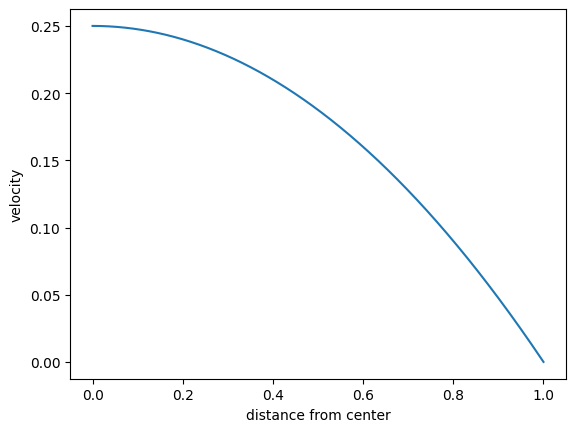

In [266]:
import matplotlib.pylab as plt

pressure_drop = 1 
mu = 1
L = 1

def v(R,r):
    return pressure_drop*(R**2 - r**2) / (4*mu*L)

R = np.ones(1000)
rlist = np.linspace(0,1,1000)

vs = [v(i,j) for i,j in zip(R,rlist)]

plt.plot(rlist, vs)
plt.xlabel('distance from center')
plt.ylabel('velocity')
plt.show()

## Question 4

Evaluate the following integrals analytically (possibly with help from an integral table) and using sympy:

1. $\displaystyle
\int \frac{dx}{x^2 + 16}  
$

2. $\displaystyle
\int \frac{dx}{x^2 - 16}  
$

3. $\displaystyle
\int \frac{dx}{x^2 + 5x}  
$

4. $\displaystyle
\int dx\,\frac{(2x+1)}{(x+1)(x+2)}  
$

5. $\displaystyle
\int dx\,\frac{x^2}{x + 7}  
$

6. $\displaystyle
\int dx\,x\sqrt{3x+4}
$

7. $\displaystyle
\int dx\,\frac{x}{\sqrt{3x+4}}
$

In [10]:
import sympy as smp

x = smp.symbols('x')

int1 = smp.integrate((1/ (x**2 + 16)))

display(int1)

atan(x/4)/4